<a href="https://colab.research.google.com/github/GUC-DM/mini-project-1-georgina-adel-bit07-ahmed-walid-bit07/blob/main/Mini-Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project 1 - Classification

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Ahmed Walid Mahmoud

ID: 43-2812

Tutorial: BIT07

---

Name: Georgina Adel Naguib

ID: 43-2654

Tutorial: BIT07

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

## Importing Libraries \& Dataset

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('telecom_churn.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2020/main/data/telecom_churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,$99.65/m,$820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),$89.1/m,$1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,$29.75/m,$301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,$104.8/m,$3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),$56.15/m,$3487.95,No


## Data Inspection & Cleaning (if any)

Here, we are using the .any() function for detection of where the missing values would be. It is clear that there are missing values in both customerID and totalcharges. 

In [79]:
df.isnull().any()
df.isnull().sum()

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        853
Churn                 0
dtype: int64

Here, we are dropping the customer ID because it has missing values, and it 
will not be needed in our classification and our final results 


In [80]:
df= df.drop(columns='customerID')

Here, we are dropping the Total Charges because it will not be needed in our
classification and our final results as it is driven from the multiplication of the monthly charges and tenure. And because it has missing values. 

In [81]:
df= df.drop(columns='TotalCharges')

Here, we had some issues with the $ sign, so we had to remove it from the string, we also removed the /m in the monthly charges so not it is just number to be easily used and converted to int or float, and then we did the conversion to floats. Following that we normalized the total charges and the monthly charges using the min and max method. It wasn't needed, yes, but it was for the sake of making sure everything is clean if these data were needed at any point in furthtur usage. 


In [82]:

df['MonthlyCharges']= df['MonthlyCharges'].replace({'\$':''}, regex = True)
df['MonthlyCharges']= df['MonthlyCharges'].replace({'\/m':''}, regex = True)


df['MonthlyCharges']= pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df["MonthlyCharges"]=((df["MonthlyCharges"]-df["MonthlyCharges"].min())/(df["MonthlyCharges"].max()-df["MonthlyCharges"].min()))*1

In [83]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,0.662189,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0.845274,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.112935,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0.558706,Yes


Now, to do visualization, it only made sense that we would turn our variables into numbers that can be easily plotted and graphed. So, for the sake of facilitation, we used the labelEncoder to chaneg everything into number format, even for columns that had binary data like gender. We could have use the one hot encoder but, again, for the sake of having cleaner code.

In [84]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()

ml= LabelEncoder()
df_encoded['MultipleLines'] = ml.fit_transform(df['MultipleLines'])

IS= LabelEncoder()
df_encoded['InternetService'] = IS.fit_transform(df['InternetService'])

os= LabelEncoder()
df_encoded['OnlineSecurity'] = os.fit_transform(df['OnlineSecurity'])

OB = LabelEncoder()
df_encoded['OnlineBackup'	] = OB.fit_transform(df['OnlineBackup'	])

DP= LabelEncoder()
df_encoded['DeviceProtection'] = DP.fit_transform(df['DeviceProtection'])

TS = LabelEncoder()
df_encoded['TechSupport'] = TS.fit_transform(df['TechSupport'])

STV = LabelEncoder()
df_encoded['StreamingTV'] = STV.fit_transform(df['StreamingTV'])

SMovies = LabelEncoder()
df_encoded['StreamingMovies'] = SMovies.fit_transform(df['StreamingMovies'])

Cont= LabelEncoder()
df_encoded['Contract'] = Cont.fit_transform(df['Contract'])

PM = LabelEncoder()
df_encoded['PaymentMethod'] = PM.fit_transform(df['PaymentMethod'])

G= LabelEncoder()
df_encoded['gender'] = G.fit_transform(df['gender'])

Partner = LabelEncoder()
df_encoded['Partner'] = Partner.fit_transform(df['Partner'])

Dependents = LabelEncoder()
df_encoded['Dependents'] = Dependents.fit_transform(df['Dependents'])

PBilling = LabelEncoder()
df_encoded['PaperlessBilling'] = PBilling.fit_transform(df['PaperlessBilling'])

PService= LabelEncoder()
df_encoded['PhoneService' ] = PService.fit_transform(df['PhoneService' ])

df_encoded["Churn"].replace({"Yes":1, "No": 0}, inplace=True)
print(df_encoded)


df_encoded.info()

      gender  SeniorCitizen  Partner  ...  PaymentMethod  MonthlyCharges  Churn
0          0              0        1  ...              2        0.115423      0
1          1              0        0  ...              3        0.385075      0
2          1              0        0  ...              3        0.354229      1
3          1              0        0  ...              0        0.239303      0
4          0              0        0  ...              2        0.521891      1
...      ...            ...      ...  ...            ...             ...    ...
7038       1              0        1  ...              3        0.662189      0
7039       0              0        1  ...              1        0.845274      0
7040       0              0        1  ...              2        0.112935      0
7041       1              1        1  ...              3        0.558706      1
7042       1              0        0  ...              0        0.869652      0

[7043 rows x 19 columns]
<class 'pandas

## Exploratory Data Analysis

**Q0 (example): How long do churned customers stay with the company before leaving?**

In [85]:
df.loc[df['Churn'] == 1, 'tenure'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: tenure, dtype: float64

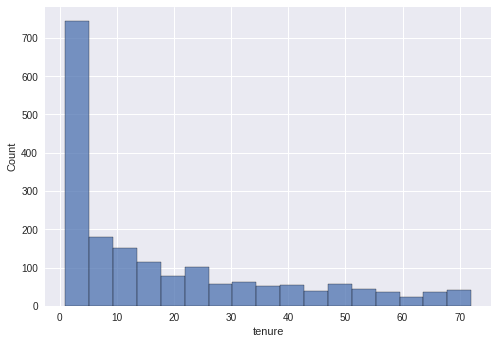

In [86]:
sns.histplot(x='tenure', data=df[df['Churn'] == 'Yes']);

*Example Note: A histogram was chosen to show the distribution of tenure of churned customers. Alternatively, a violin plot or a box plot may also be used.*

**Answer**: 75% of churned customers stayed with the company 2.5 years before leaving. 50% of churned customers left in just 10 months.

**Q1: What are the most correlated attributes with customer churn?**

Now, here we displayed a heatmap to see corellation between everything and the heatmap. Please do look bellow the heatmap for explanation written for the correlation between everything and the heatmap.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


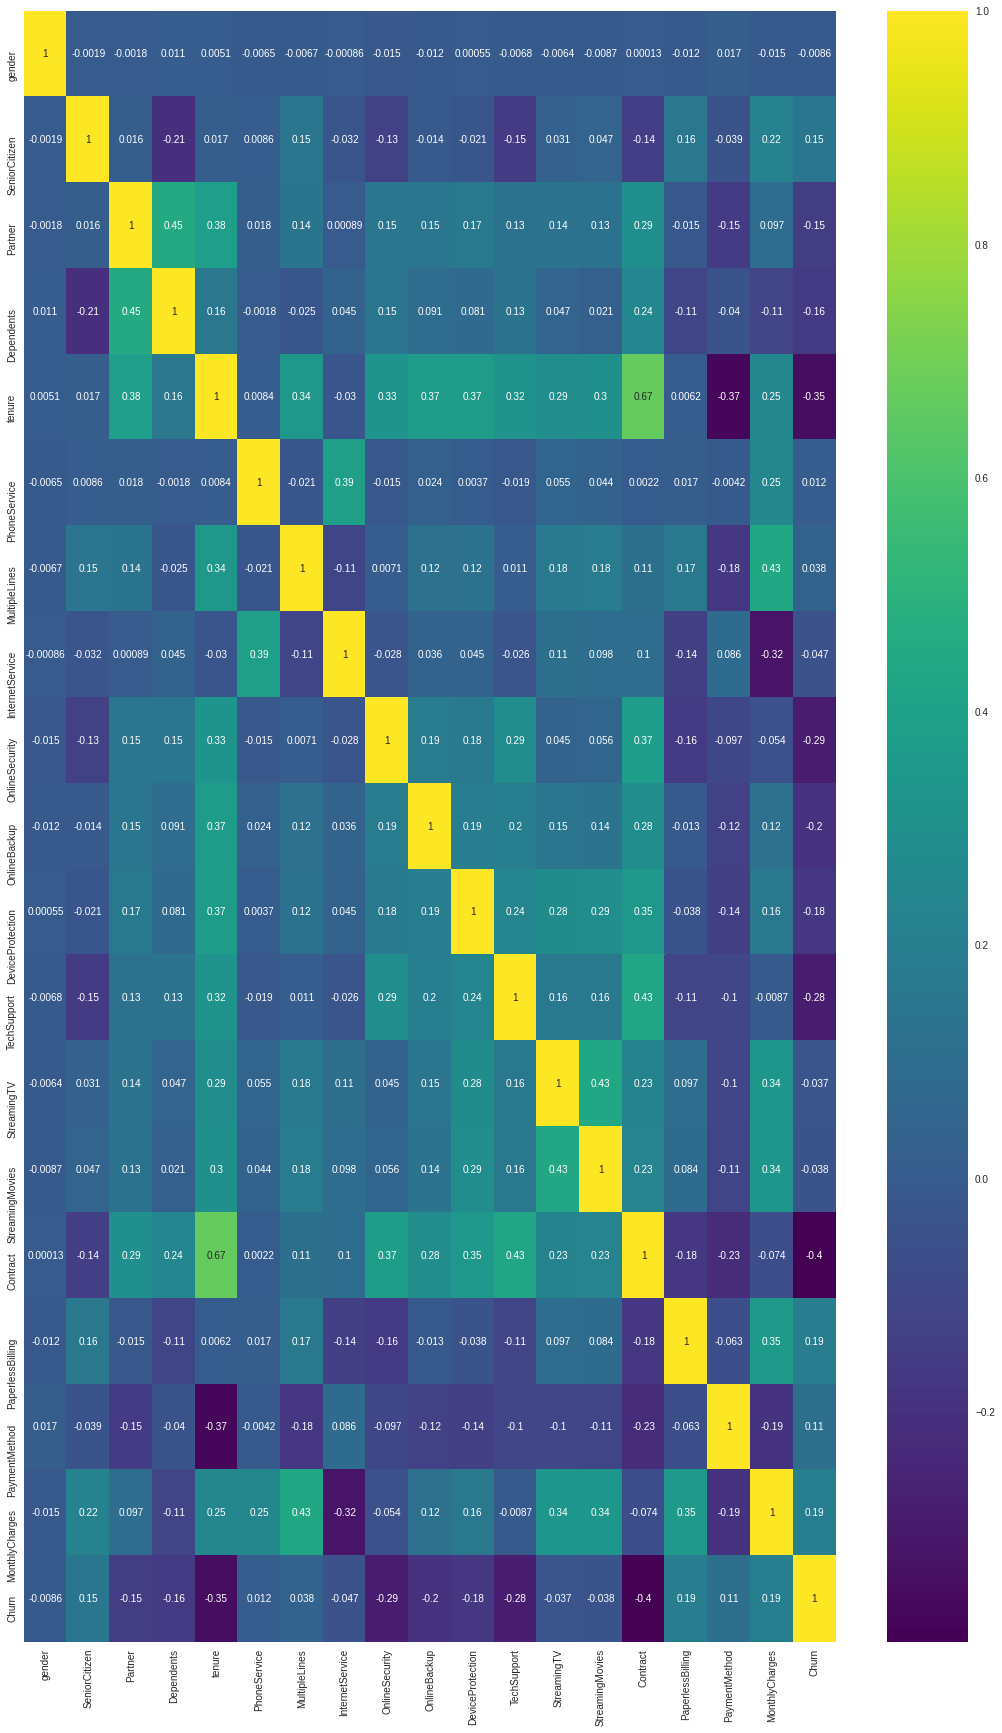

In [87]:
corr = df_encoded.corr()
corr['Churn'].sort_values(ascending=False, key=lambda x: x.abs())
f = plt.figure(figsize=(40,30))
ax = f.add_subplot(121)
ax=f.add_subplot(121)
sns.heatmap(corr, cmap='viridis', annot=True, ax=ax);

Highest negatively correlated variables are Contract and Tenuere; the highest postively correlated variables are both payment method and monthly charges.

So, we can see that churn and gender are almost not correlated at all since the gender is so close to the zero. 

SeniorCitizenship is 0.15, which means the correlation between SeniorCitizenship is 15%, howeverm it won't have that great of an impact.

Parter is also 15% as well, but it is inversely correlated, however, like the SeniorCitizenship, it is more closer to the zero, so it will not have the great of impact

Depenedatnats is 16%, but is also negatively correlated and will not have that much of an impact as well.

The tenure is negatively correlated with 35%, which we can say it high and have a slightly seen effect. 

Phoneservices is just 1.2% of correlation in the positive side, which won't affect churn as much. 

Having multiple lines is only correlated to the churn by a percentage of 3.8%, which is still not as much to affect the customer's churn.

Internset services is correlated to the churn by a value of 4.7% negatively, which is still not that much to affect the churn. 

online security is negatively correlated to the churn with a 29%, which is something that can be considered when churning. 

Online backup is negatively correlated to the churn with the value of 20%, which is still not high but can be conisdered as a reason. 

Device protection and Churn are correlated with 18% negative corrlation, which can be seen as a low reason. 

Tech support has a 28% of negative correlation with churn, which is still not high, but logically can be considered as a reason for customer churn. 

Streaming TV is also negatively correlated with churn but with low percentage of 3.7%

Streaming movies, like TV, is negatively correlated to churn but with the percentage of 3.8%

Contracts is negatively correlated with Churn with a realitevly high percentage of 40%

paperbilling is correlated positevly with churn with the percentage of 19%, which is not high. 

Payment methods is positively correlated to the churn with 11% only. 

monthly charges is positively correlated to the churh with the percentage of 19%.


**Q2: Are senior citizens more likely to churn than non-senior citizens?**

Here, we can clealry see that  senior citizens has a higher percentage of churning rather than the non senior citizens.

In [88]:
# To use crosstab with "normalize = 'index'". 
df_encoded["SeniorCitizen"].replace({1:"Yes", 0: "No"}, inplace=True)
df_encoded["Churn"].replace({1:"Yes", 0: "No"}, inplace=True)
df_percent = pd.crosstab(df_encoded['SeniorCitizen'],df_encoded['Churn'],
                         normalize = 'index').rename_axis(None)
# Multiply all percentages by 100 for graphing. 
df_percent *= 100

print (df_percent)


Churn         No        Yes
No     76.393832  23.606168
Yes    58.318739  41.681261


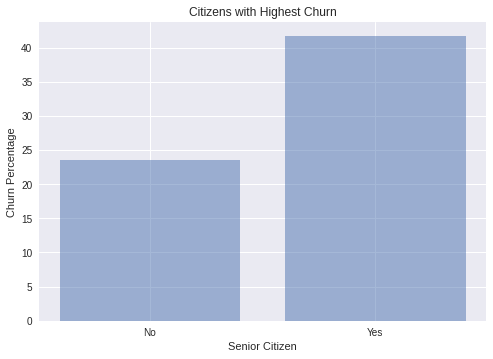

In [89]:
plt.bar(df_percent.index, df_percent.Yes, align='center', alpha=0.5)
plt.xlabel('Senior Citizen')
plt.ylabel('Churn Percentage')
plt.title('Citizens with Highest Churn')

plt.show()

In [90]:
df_encoded["SeniorCitizen"].replace({"Yes":1, "No": 1}, inplace=True)
df_encoded["Churn"].replace({"Yes":1, "No": 0}, inplace=True)

**Q3: Which payment method has the highest churn rate?**

Using barplot, it is very clear that the Electronic check is the highest method to have churn rate. 

In [91]:
df_encoded["Churn"].replace({1:"Yes", 0: "No"}, inplace=True)
df_percent = pd.crosstab(df['PaymentMethod'],df_encoded['Churn'],
                         normalize = 'index').rename_axis(None)
# Multiply all percentages by 100 for graphing. 
df_percent *= 100

print (df_percent)

Churn                             No        Yes
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


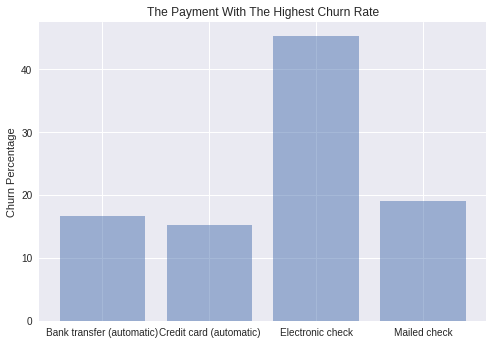

In [92]:
plt.bar(df_percent.index, df_percent.Yes, align='center', alpha=0.5)
plt.ylabel('Churn Percentage')
plt.title('The Payment With The Highest Churn Rate')

plt.show()

In [93]:
df_encoded["Churn"].replace({"Yes":1, "No": 0}, inplace=True)

## Modelling

We decided to use logistic regression, because the dependent variable which the churn is binary. We splitted the data so some of them can be trained and the other to be tested.

In [94]:

from sklearn.model_selection import train_test_split
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn'] 

X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.25, random_state=42)

In [95]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()


In [96]:
lr_model.fit(X_train, y_train)
y_pred=lr_model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Evaluation

The accuracy of the model is 0.8, which is a very high value and do, indeed, indicate the accuracy of our predecitions

In [97]:
lr_model.score(X_test, y_test)

0.814877910278251

Here we have 4 predictions the diagonal one which is 1161 & 274 are actual prediction, while 121 & 205 incorrect predicition.

In [98]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1161,  121],
       [ 205,  274]])

Here is the visulization of the confusion matrix

Text(0.5, 352.48, 'Predicted label')

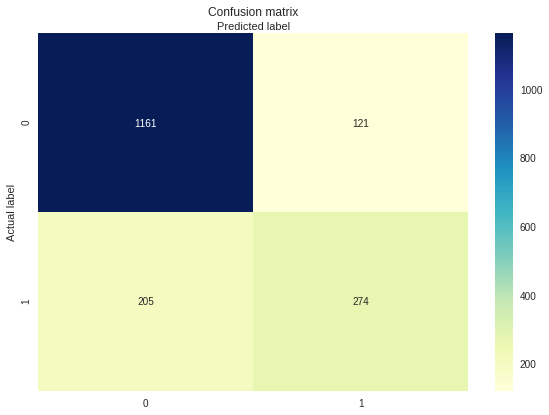

In [99]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Bonus (Optional)


we decided to use KNN beacuse we want to predict churn

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Here, the accuracy of the KNN is 0.75, which is less that the logistic regression but is still a high value, which means that our predections were, indeed, correct. 

In [101]:
knn_model.score(X_test, y_test)

0.7569562748438388